0) ОПИСАНИЕ ЗАДАЧИ

HR Analysis Case Study

В наборе данных представлены сведения о работниках некой компании, собранные отделом HR (отдел кадров), присутствуют следующие атрибуты для каждого из сотрудников:

id - идентификатор

department - отдел

region - регион

education - образование

gender - пол

recruitment_channel - канал найма

no_of_trainings - количество пройденных тренингов

age - возраст

previous_year rating - рейтинг сотрудника за прошлый год

length_of_service - стаж работы

KPIs_met > 80 % - ключевые показатели эффективности выше 80 %

awards_won ? - выигрывал ли награды

avg_training_score - средний балл на тренингах



In [202]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

1) ЧТЕНИЕ ДАННЫХ

In [203]:
data = pd.read_csv('train.csv')
data.shape

(54808, 14)

(54808, 14)

# Новый раздел

In [204]:
data.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [205]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB
<class 'panda

ХАРАКТЕРИСТИКА ДАННЫХ

In [206]:
data.columns


Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [207]:
data.describe() # числовые характеристики


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [208]:
data.describe(include=['object']) # категориальные характеристики

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


2) ВИЗУАЛИЗАЦИЯ ДАННЫХ

In [209]:
sns.set(style = 'darkgrid', rc={'figure.figsize':(10, 8)})


<Axes: xlabel='age', ylabel='count'>

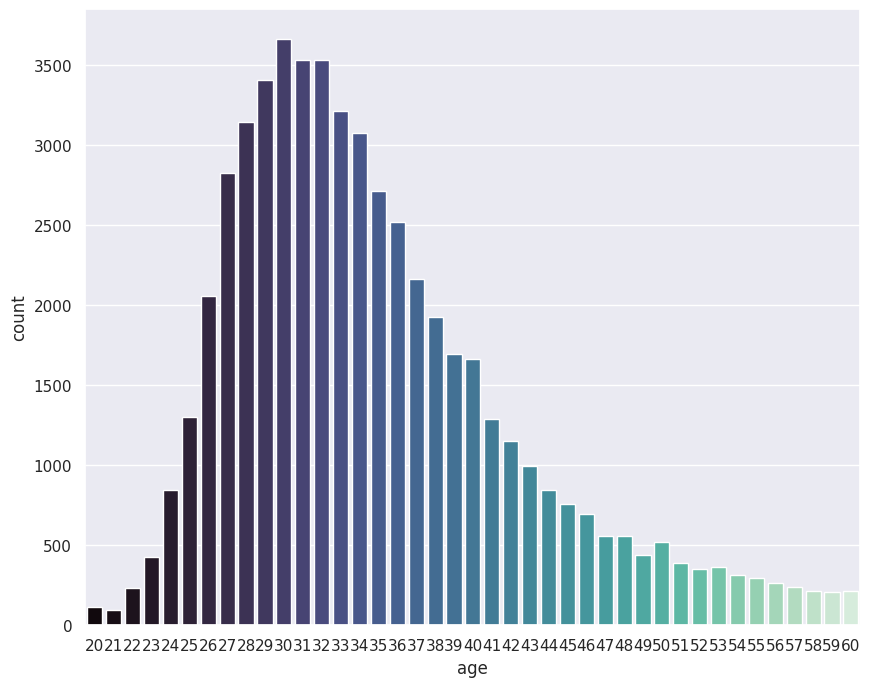

<Axes: xlabel='age', ylabel='count'>

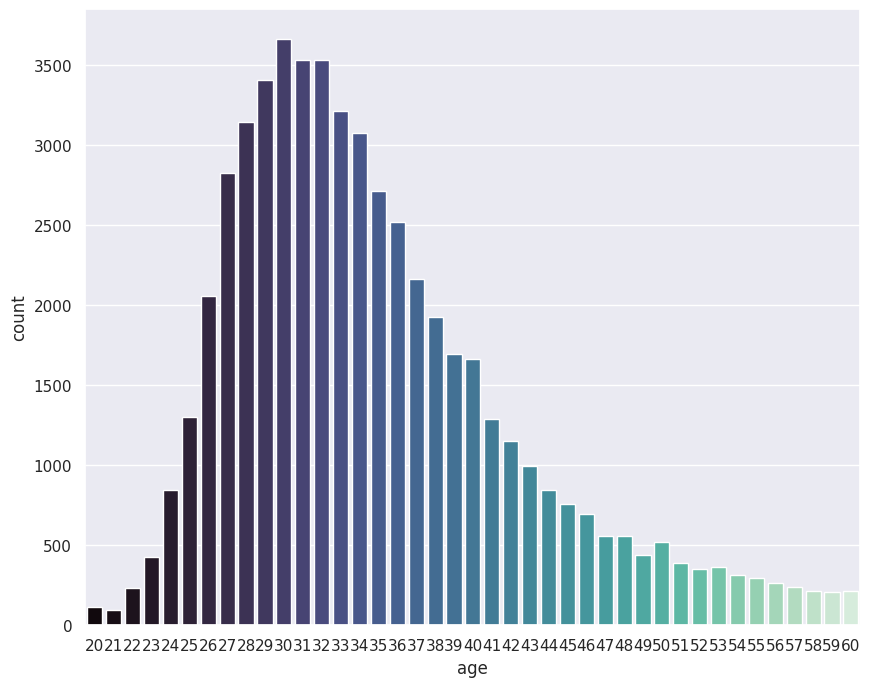

In [210]:
# распределение возрастов сотрудников

sns.countplot(x='age', data=data, palette ='mako')

([<matplotlib.patches.Wedge at 0x7e64b52fc1c0>,
 [Text(-0.6531974058391644, 0.8850610990236698, 'Male'),
  Text(0.6531974058391639, -0.8850610990236701, 'Female')])

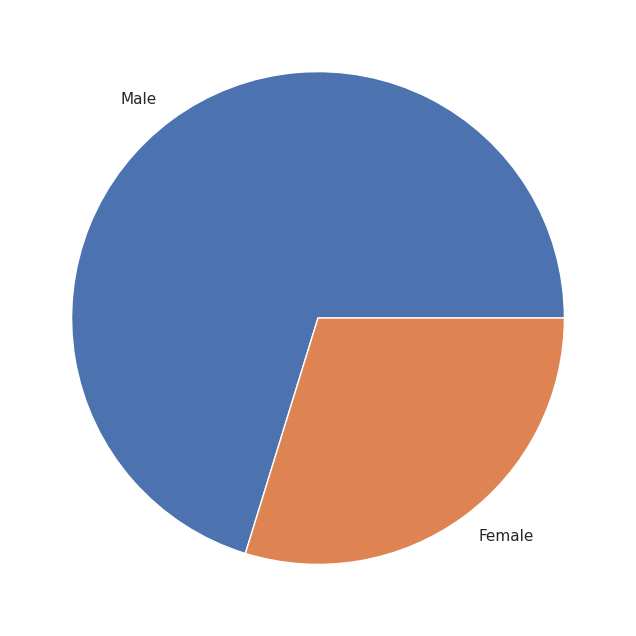

([<matplotlib.patches.Wedge at 0x7e64b226b100>,
 [Text(-0.6531974058391644, 0.8850610990236698, 'Male'),
  Text(0.6531974058391639, -0.8850610990236701, 'Female')])

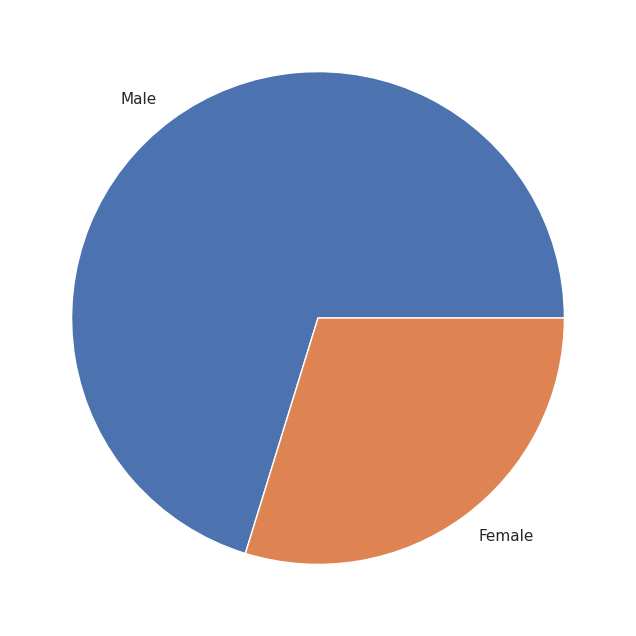

In [211]:
fig = plt.subplot # соотношение сотрудников мужского и женского пола
plt.pie(data['gender'].value_counts(), labels = ['Male', 'Female'])

<Axes: xlabel='education', ylabel='count'>

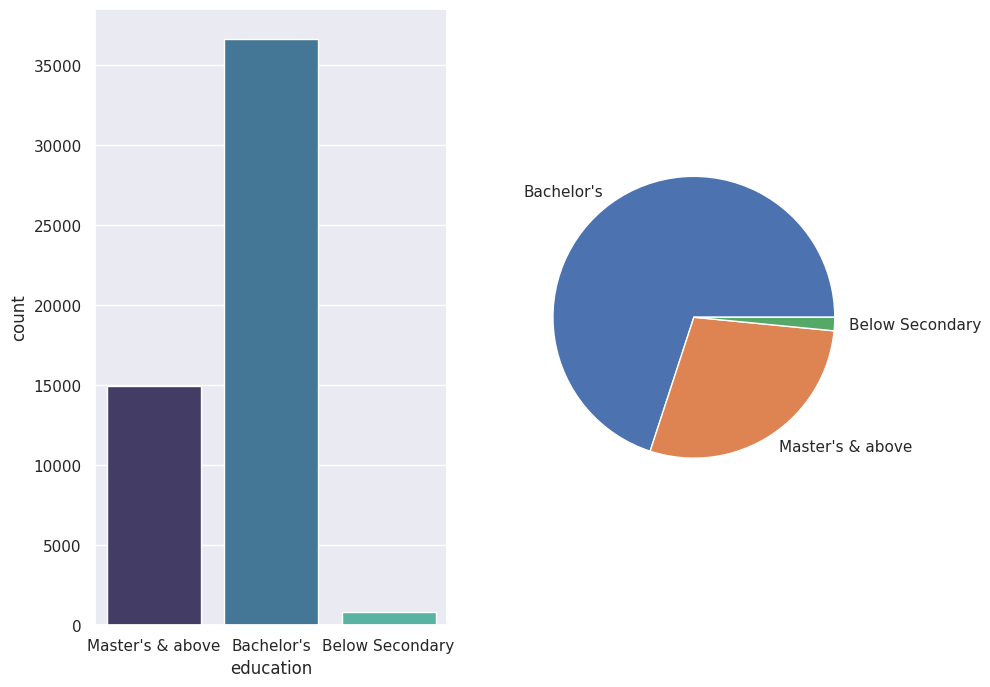

<Axes: xlabel='education', ylabel='count'>

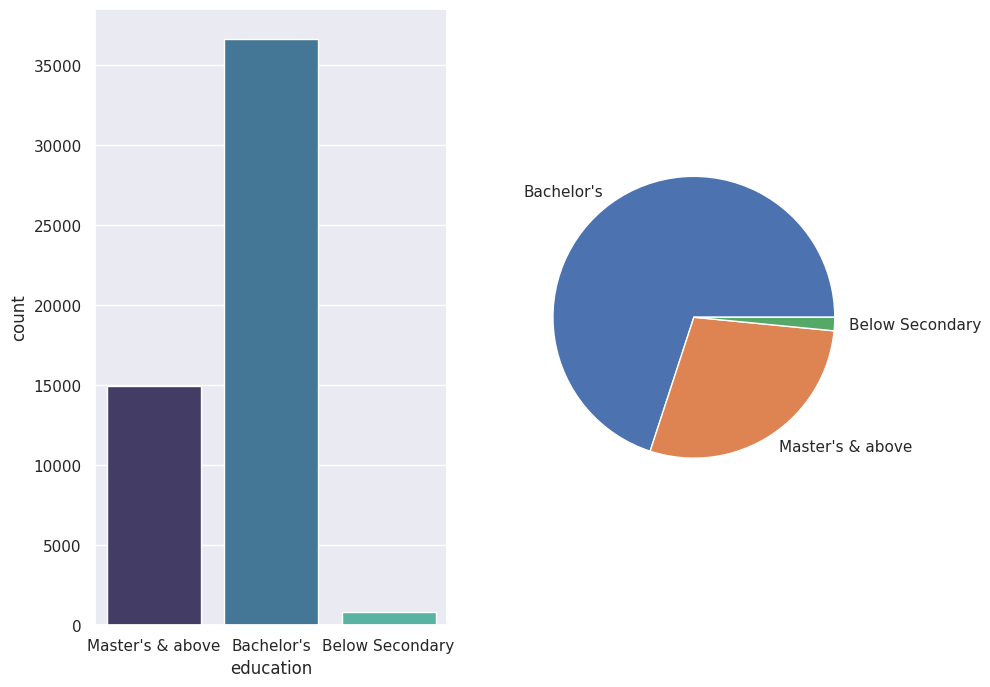

In [212]:
fig, hist =plt.subplots(1,2) # соотношение уровня образования сотрудников
plt.pie(data['education'].value_counts(), labels = ["Bachelor's", "Master's & above",'Below Secondary'])
sns.countplot(x='education', data=data,  palette="mako", ax = hist[0])


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales & Marketing'),
  Text(1, 0, 'Operations'),
  Text(2, 0, 'Technology'),
  Text(3, 0, 'Procurement'),
  Text(4, 0, 'Analytics'),
  Text(5, 0, 'Finance'),
  Text(6, 0, 'HR'),
  Text(7, 0, 'Legal'),
  Text(8, 0, 'R&D')])

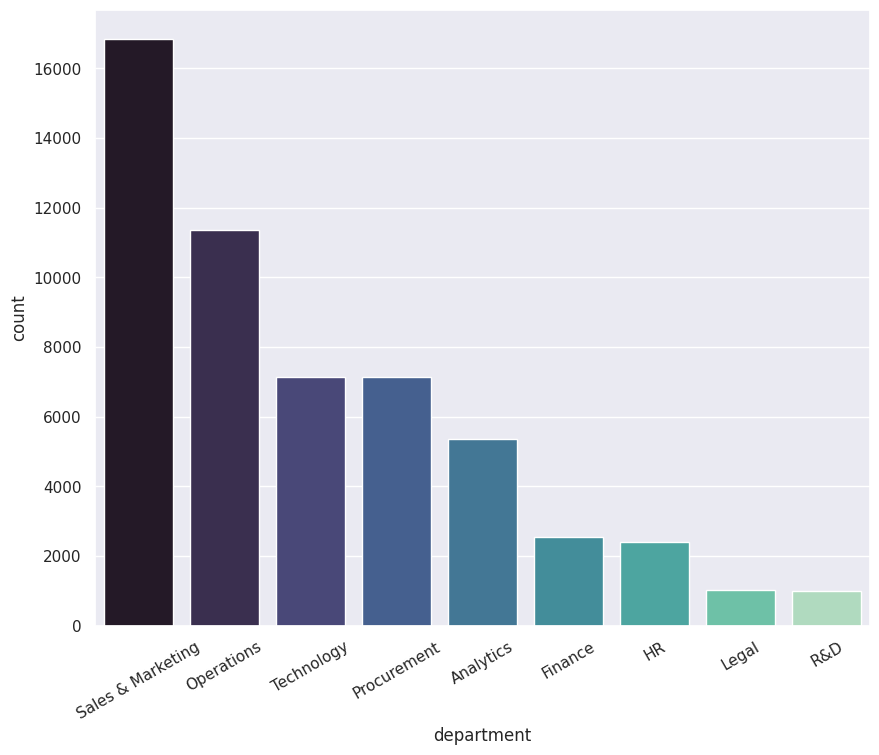

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales & Marketing'),
  Text(1, 0, 'Operations'),
  Text(2, 0, 'Technology'),
  Text(3, 0, 'Procurement'),
  Text(4, 0, 'Analytics'),
  Text(5, 0, 'Finance'),
  Text(6, 0, 'HR'),
  Text(7, 0, 'Legal'),
  Text(8, 0, 'R&D')])

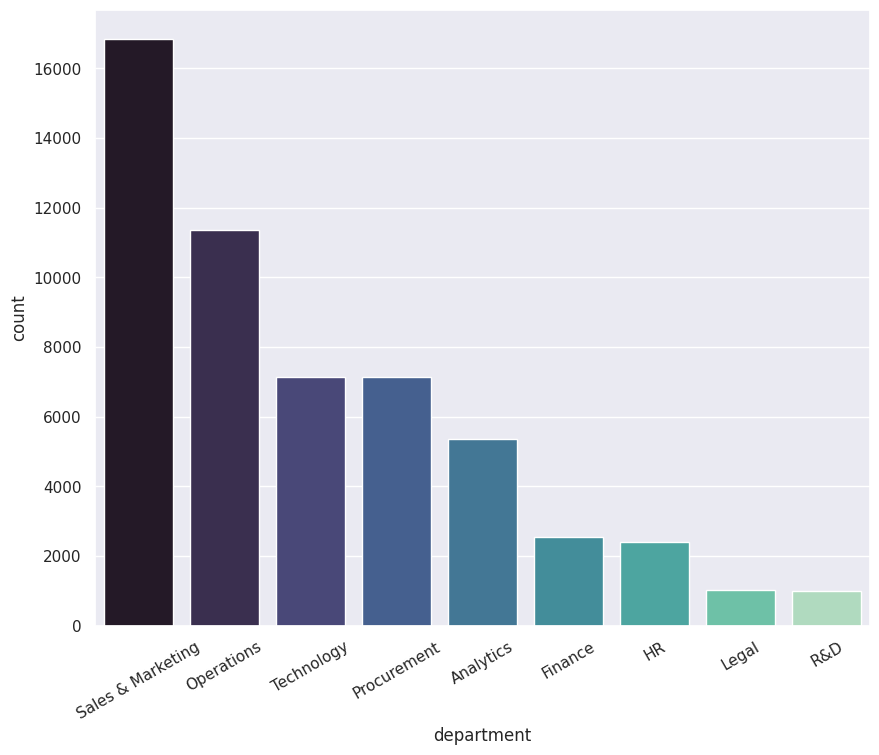

In [213]:
# занятость сотрудников в соответствующих отделах

sns.countplot(x='department', order=data['department'].value_counts().index,  data=data, palette = 'mako')
plt.xticks(rotation = 30)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales & Marketing'),
  Text(1, 0, 'Operations'),
  Text(2, 0, 'Technology'),
  Text(3, 0, 'Procurement'),
  Text(4, 0, 'Analytics'),
  Text(5, 0, 'Finance'),
  Text(6, 0, 'HR'),
  Text(7, 0, 'Legal'),
  Text(8, 0, 'R&D')])

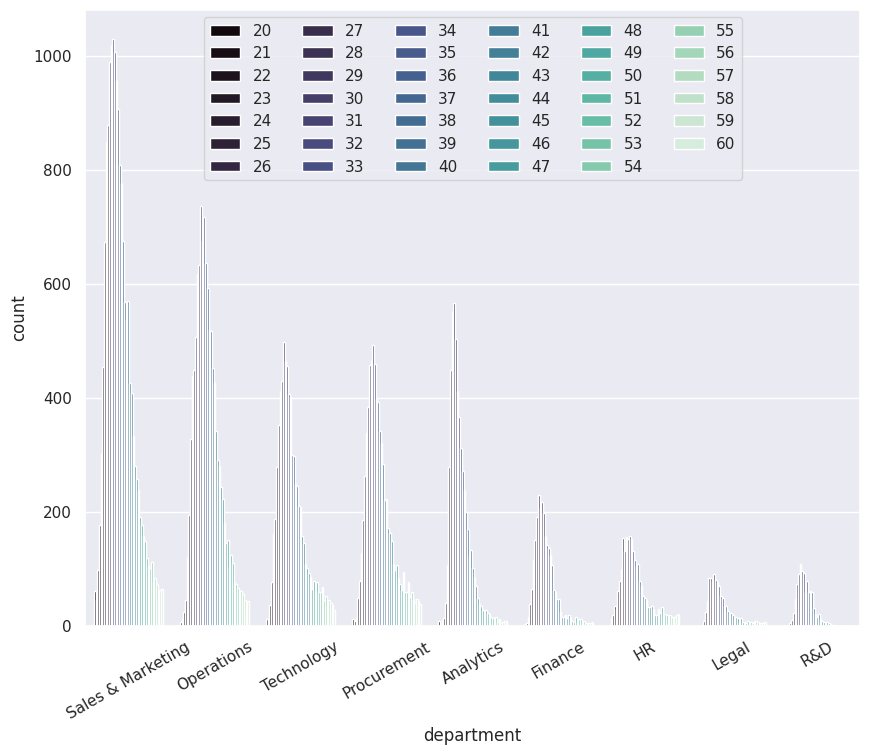

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales & Marketing'),
  Text(1, 0, 'Operations'),
  Text(2, 0, 'Technology'),
  Text(3, 0, 'Procurement'),
  Text(4, 0, 'Analytics'),
  Text(5, 0, 'Finance'),
  Text(6, 0, 'HR'),
  Text(7, 0, 'Legal'),
  Text(8, 0, 'R&D')])

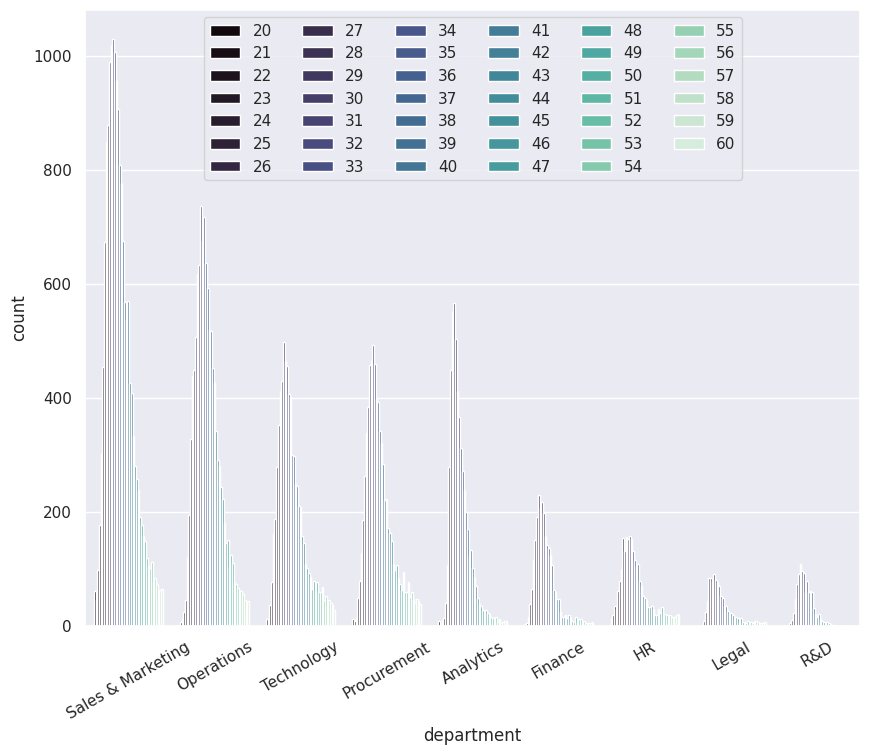

In [214]:
# занятость сотрудников разных возрастов в соответствующих отделов

sns.countplot(x='department', order=data['department'].value_counts().index, hue = 'age', palette="mako", data=data)
plt.legend(ncol=6, loc='upper center')
plt.xticks(rotation = 30)

In [215]:
data['age'].mean()


34.80391548679025

34.80391548679025

<Axes: xlabel='department'>

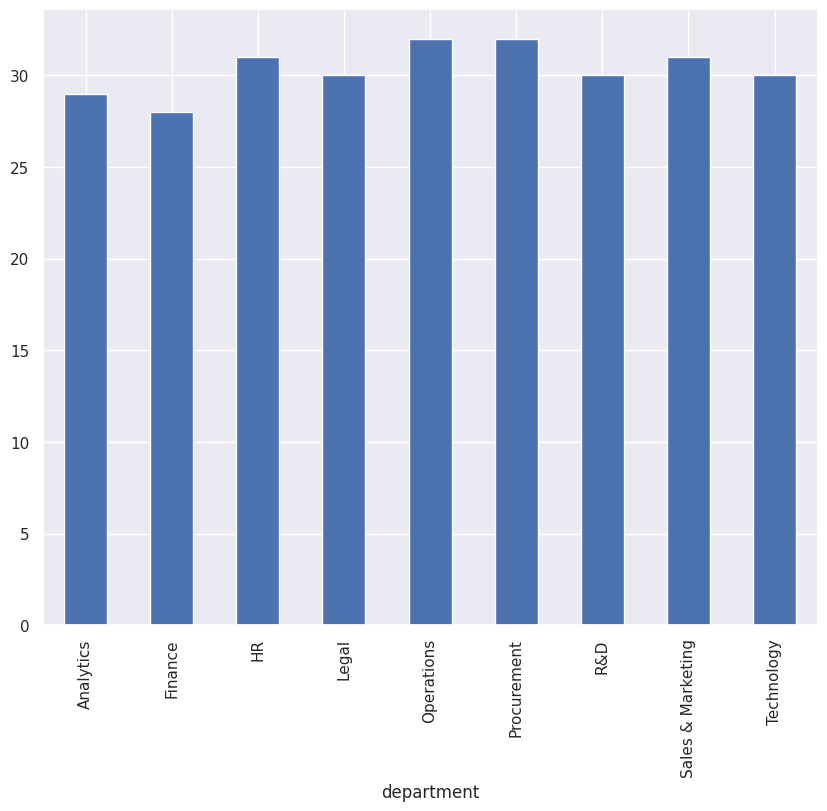

<Axes: xlabel='department'>

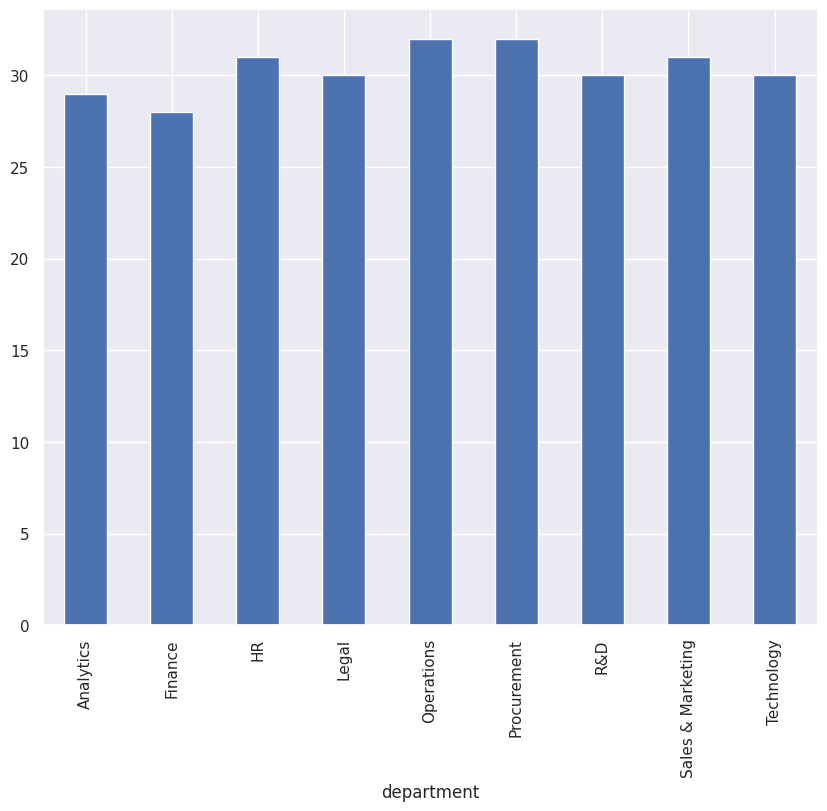

In [216]:
# моды возрастов сотрудников по отделам

data.groupby('department')['age'].agg(pd.Series.mode).plot.bar()

<Axes: xlabel='department'>

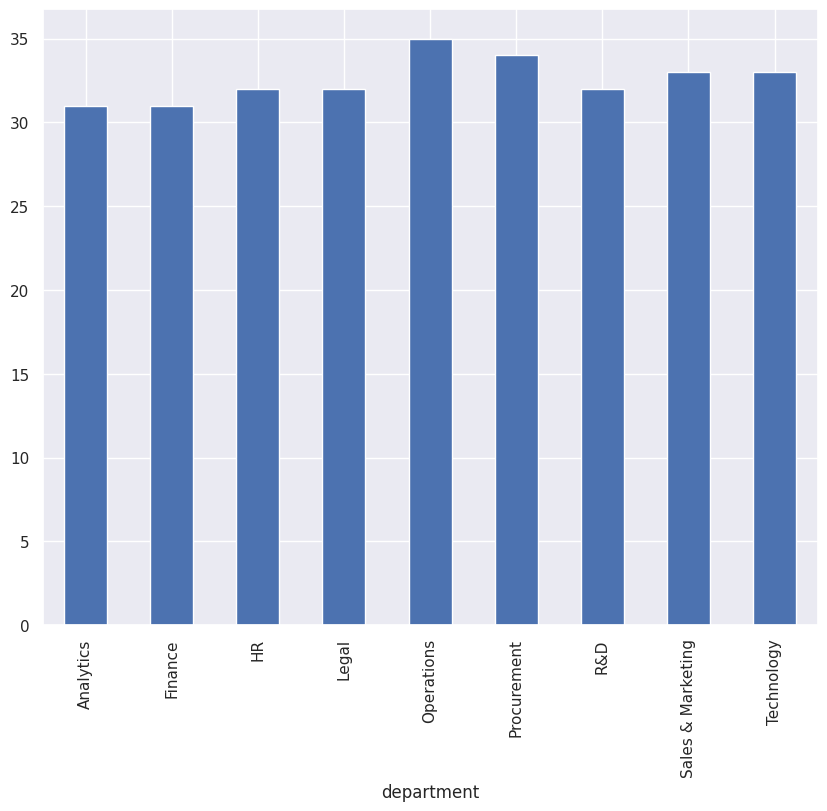

<Axes: xlabel='department'>

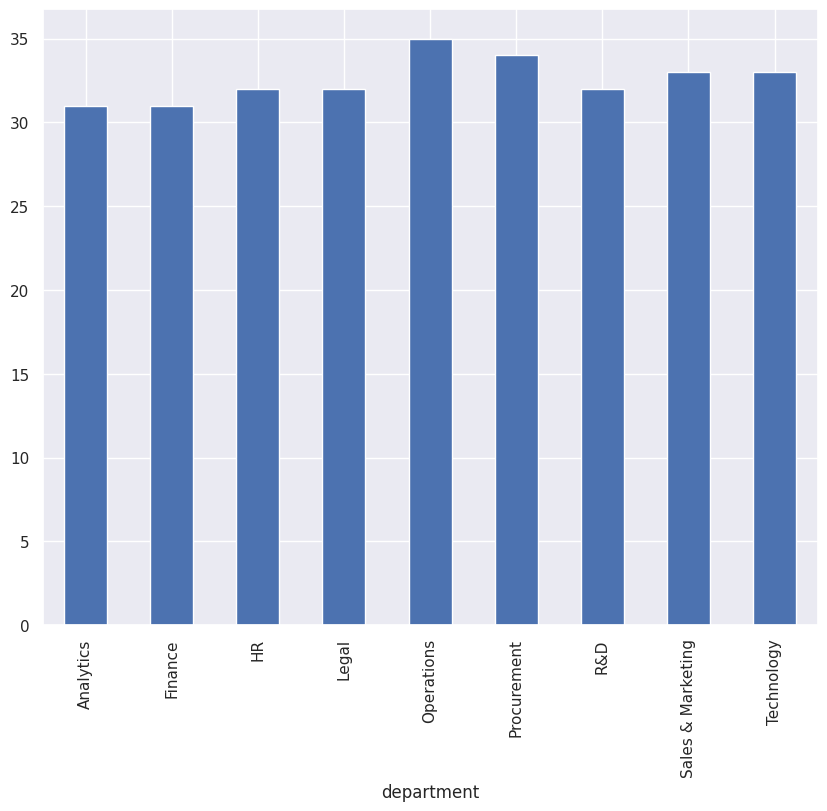

In [217]:
# медианы возрастов сотрудников по отделам

data.groupby('department')['age'].agg(pd.Series.median).plot.bar()


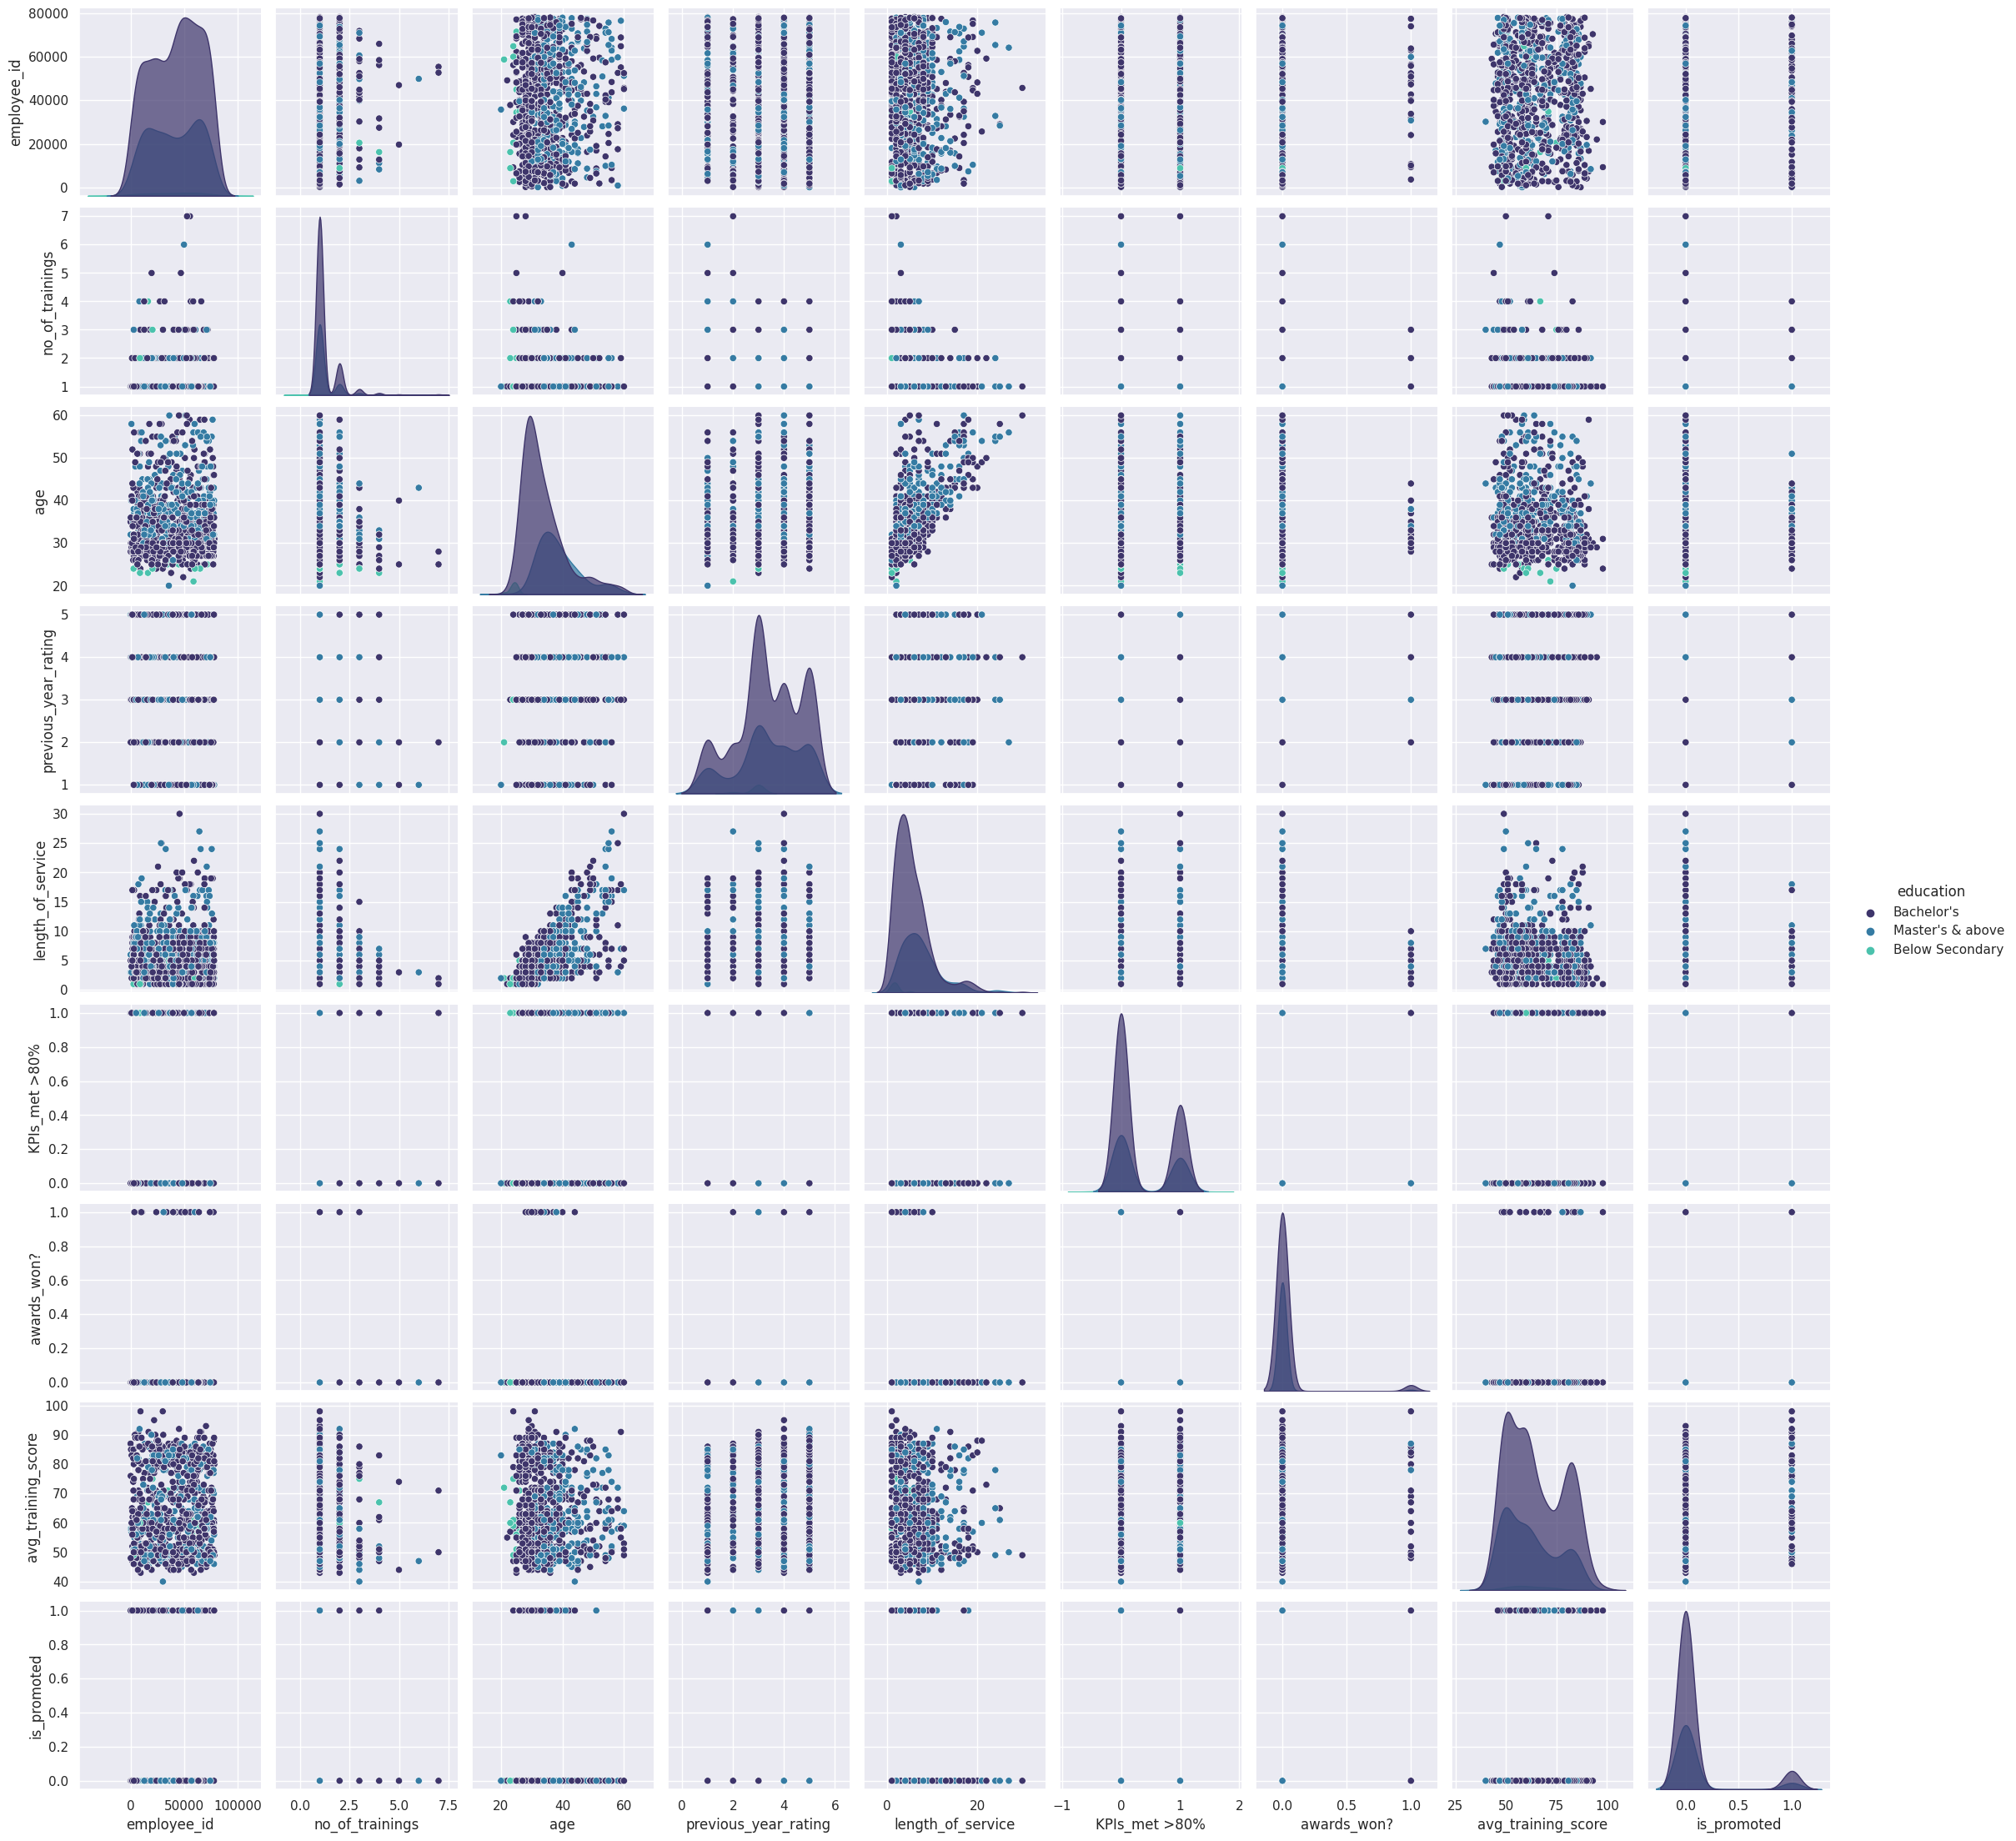

In [174]:
# диаграммы рассеивания пар переменных

np.random.seed(30)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace = False)
sns.pairplot(data.iloc[random_subset], diag_kind = 'auto', hue='education', diag_kws={'alpha':0.7}, palette = 'mako')

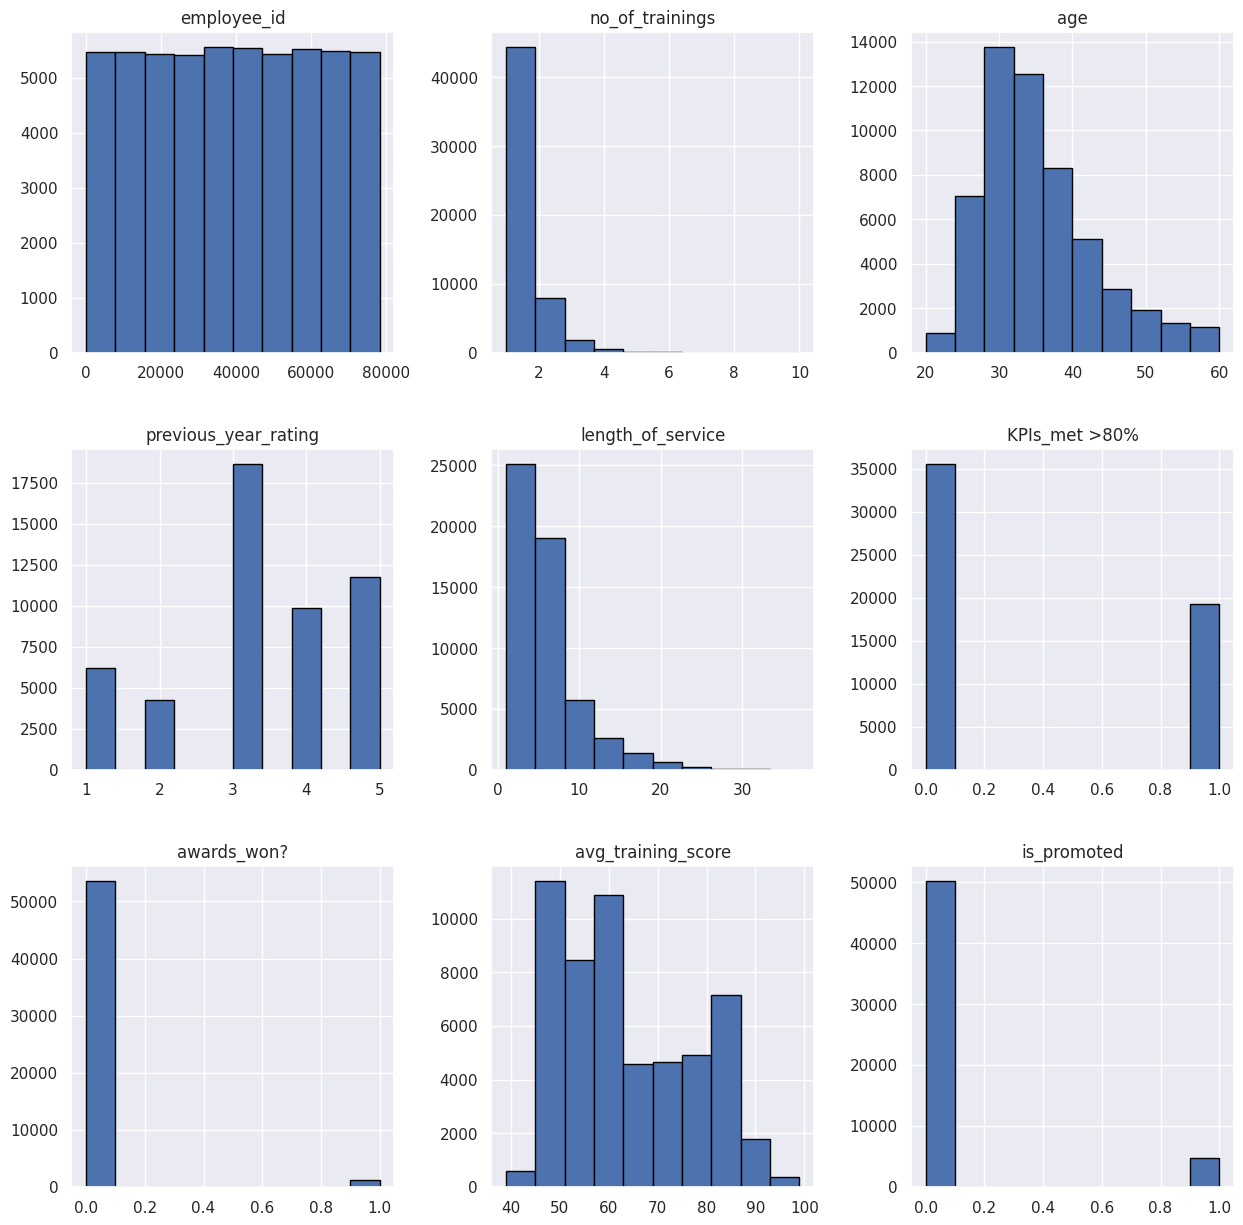

In [175]:
# распределение числовых признаков

data.hist(edgecolor='black', linewidth=1, figsize=(15, 15));

<ipython-input-176-15ad194436fb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), square=True, cmap='coolwarm')


<Axes: >

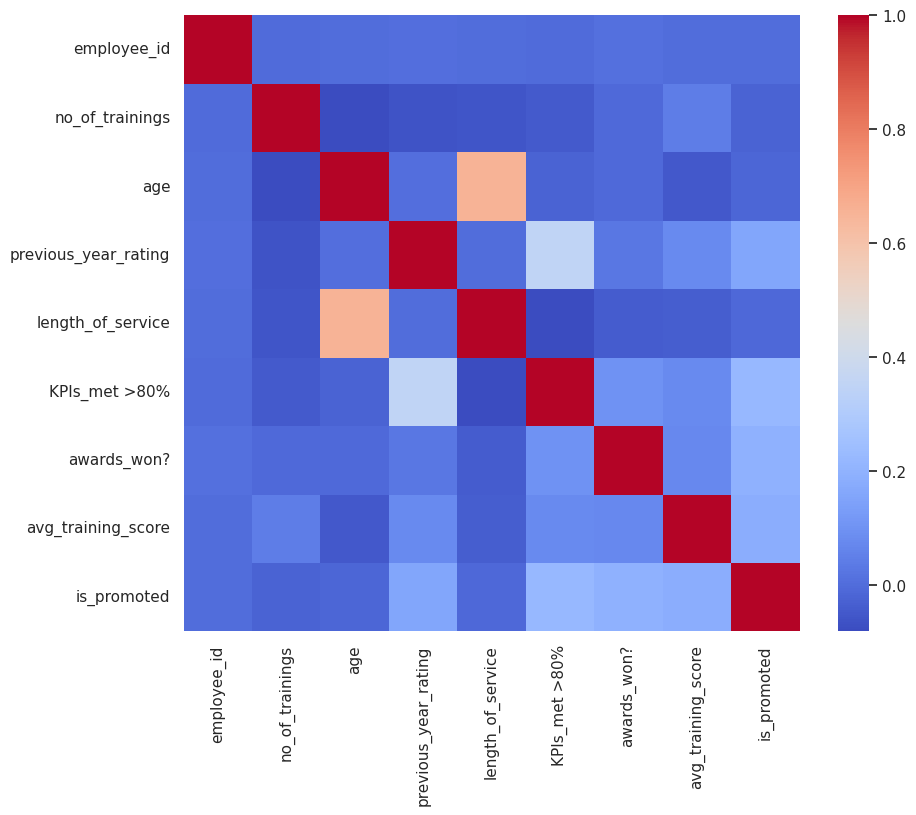

In [176]:
# корелляционная матрица

sns.heatmap(data.corr(), square=True, cmap='coolwarm')

Выводы:


- Большинство сотрудников никогда не получали награды
- Примерно 2/3 сотрудников имеют KPI ниже 80%
- Стаж работы в компании у большинства сотрудников до 10 лет, возраст среднего работника - 30 лет
- Наблюдается корреляция между стажем работы и возрастом
- Большинство сотрудников прошли только один тренинг.

3) ОБРАБОТКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ

In [177]:
data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [178]:
data.fillna(data.median(axis = 0), axis = 0, inplace = True)

data['education'].fillna(data['education'].mode().iloc[0], inplace = True)


<ipython-input-178-70d38a8cb865>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(axis = 0), axis = 0, inplace = True)


In [179]:
data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

4) ОБРАБОТКА КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ

In [180]:
# departments

edit_departments = pd.get_dummies(data['department'])

data = pd.concat((data, edit_departments), axis=1)
data = data.drop(['department'],  axis=1)
data.head()

,employee_id,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,...,is_promoted,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,65438,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,...,0,0,0,0,0,0,0,0,1,0
1,65141,region_22,Bachelor's,m,other,1,30,5.0,4,0,...,0,0,0,0,0,1,0,0,0,0
2,7513,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,...,0,0,0,0,0,0,0,0,1,0
3,2542,region_23,Bachelor's,m,other,2,39,1.0,10,0,...,0,0,0,0,0,0,0,0,1,0
4,48945,region_26,Bachelor's,m,other,1,45,3.0,2,0,...,0,0,0,0,0,0,0,0,0,1


In [181]:
# region

edit_region = pd.get_dummies(data['region'])

data = pd.concat((data, edit_region), axis=1)
data = data.drop(['region'],  axis=1)
data.head()

,employee_id,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,65438,Master's & above,f,sourcing,1,35,5.0,8,1,0,...,0,0,0,0,0,0,0,1,0,0
1,65141,Bachelor's,m,other,1,30,5.0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7513,Bachelor's,m,sourcing,1,34,3.0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2542,Bachelor's,m,other,2,39,1.0,10,0,0,...,0,0,0,0,0,0,0,0,0,0
4,48945,Bachelor's,m,other,1,45,3.0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
# gender

data['gender'] = pd.factorize(data['gender'])[0]
data.head()

,employee_id,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,65438,Master's & above,0,sourcing,1,35,5.0,8,1,0,...,0,0,0,0,0,0,0,1,0,0
1,65141,Bachelor's,1,other,1,30,5.0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7513,Bachelor's,1,sourcing,1,34,3.0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2542,Bachelor's,1,other,2,39,1.0,10,0,0,...,0,0,0,0,0,0,0,0,0,0
4,48945,Bachelor's,1,other,1,45,3.0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
# education

edit_education = pd.get_dummies(data['education'])

data = pd.concat((data, edit_education), axis=1)
data = data.drop(['education'],  axis=1)
data.head()

,employee_id,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,...,region_34,region_4,region_5,region_6,region_7,region_8,region_9,Bachelor's,Below Secondary,Master's & above
0,65438,0,sourcing,1,35,5.0,8,1,0,49,...,0,0,0,0,1,0,0,0,0,1
1,65141,1,other,1,30,5.0,4,0,0,60,...,0,0,0,0,0,0,0,1,0,0
2,7513,1,sourcing,1,34,3.0,7,0,0,50,...,0,0,0,0,0,0,0,1,0,0
3,2542,1,other,2,39,1.0,10,0,0,50,...,0,0,0,0,0,0,0,1,0,0
4,48945,1,other,1,45,3.0,2,0,0,73,...,0,0,0,0,0,0,0,1,0,0


In [184]:
# recruitment channel

edit_recruitment_channel = pd.get_dummies(data['recruitment_channel'])

data = pd.concat((data, edit_recruitment_channel), axis=1)
data = data.drop(['recruitment_channel'],  axis=1)
data.head()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_6,region_7,region_8,region_9,Bachelor's,Below Secondary,Master's & above,other,referred,sourcing
0,65438,0,1,35,5.0,8,1,0,49,0,...,0,1,0,0,0,0,1,0,0,1
1,65141,1,1,30,5.0,4,0,0,60,0,...,0,0,0,0,1,0,0,1,0,0
2,7513,1,1,34,3.0,7,0,0,50,0,...,0,0,0,0,1,0,0,0,0,1
3,2542,1,2,39,1.0,10,0,0,50,0,...,0,0,0,0,1,0,0,1,0,0
4,48945,1,1,45,3.0,2,0,0,73,0,...,0,0,0,0,1,0,0,1,0,0


 TEST AND TRAIN SAMPLES PREPARATION

In [185]:
data = pd.read_csv('train.csv')
data.fillna(data.median(axis = 0), axis = 0, inplace = True)
data['education'].fillna(data['education'].mode().iloc[0], inplace = True)

X = pd.get_dummies(data)
X.columns

<ipython-input-185-3b5ee2ff1651>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(axis = 0), axis = 0, inplace = True)


Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'department_Analytics',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_1', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', 'region_region

In [186]:
Y = X[['is_promoted']]
X = X.drop(['is_promoted'], axis=1)

print("x:", X.shape)
print("y:", Y.shape)

x: (54808, 59)
y: (54808, 1)


5) НОРМАЛИЗАЦИЯ

In [187]:
X=(X-X.mean())/X.std()


6) РАЗБИЕНИЕ НА ОБУЧАЮЩУЮ И ТЕСТОВУЮ ВЫБОРКИ

In [188]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 15)

print("x_train: ", x_train.shape)
print("x_test ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (43846, 59)
x_test  (10962, 59)
y_train:  (43846, 1)
y_test:  (10962, 1)


In [189]:
x_no_reg_train = x_train.copy()
x_no_reg_test = x_test.copy()
for i in range(1, 30):
    x_no_reg_train = x_no_reg_train.drop([f'region_region_{i}'], axis = 1)
    x_no_reg_test = x_no_reg_test.drop([f'region_region_{i}'], axis = 1)

7) ПРЕДСКАЗАТЕЛЬНЫЕ МОДЕЛИ

In [190]:
# random forest

forest = RandomForestClassifier()
forest.fit(x_train, y_train.values.ravel())

print("Train Accuracy :", forest.score(x_train, y_train))
print("Test Accuracy :", forest.score(x_test, y_test))

Train Accuracy : 0.9999315787072937
Test Accuracy : 0.9346834519248313


[[0.99810832 0.00189168]
 [0.75925926 0.24074074]]


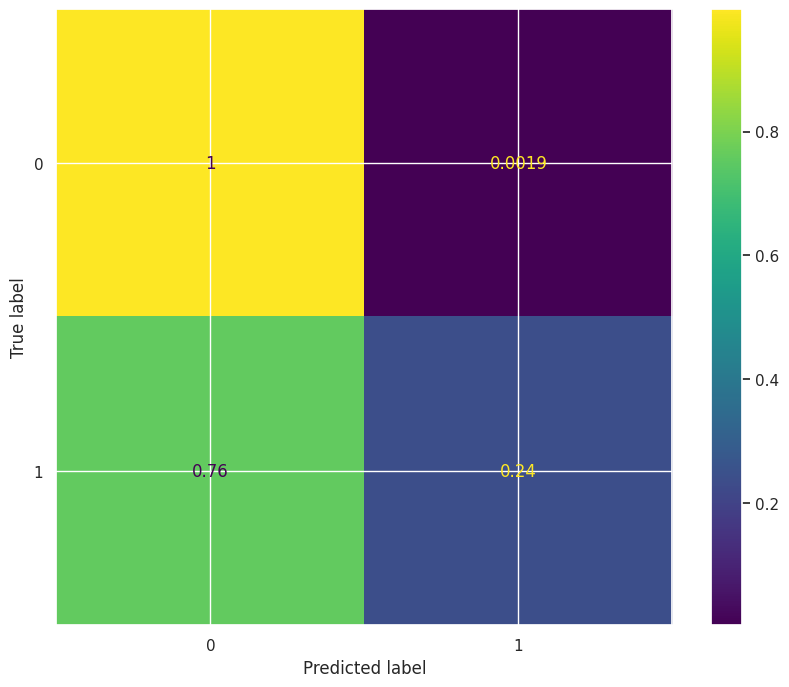

In [191]:
ConfusionMatrixDisplay.from_estimator(forest, x_test, y_test, normalize='true')

print(confusion_matrix(y_test, forest.predict(x_test),normalize='true'))

In [192]:
# k nearet neighbours

accuracy = pd.DataFrame({'size':[],'train_accuracy':[],'test_accuracy':[]})

for i in range(1,13,2):
    kNN = KNeighborsClassifier(n_neighbors = i)
    kNN.fit(x_train, y_train.values.ravel())
    accuracy  = accuracy.append({'size':i,'train_accuracy':kNN.score(x_train, y_train),
                                 'test_accuracy':kNN.score(x_test, y_test)},ignore_index=True)
print(accuracy)

<ipython-input-192-c78a392cc17e>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy  = accuracy.append({'size':i,'train_accuracy':kNN.score(x_train, y_train),
<ipython-input-192-c78a392cc17e>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy  = accuracy.append({'size':i,'train_accuracy':kNN.score(x_train, y_train),
<ipython-input-192-c78a392cc17e>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy  = accuracy.append({'size':i,'train_accuracy':kNN.score(x_train, y_train),
<ipython-input-192-c78a392cc17e>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy  = accuracy.append({'size':i,'train_accuracy':kNN.score

   size  train_accuracy  test_accuracy
0   1.0        1.000000       0.878581
1   3.0        0.935661       0.904853
2   5.0        0.925649       0.913793
3   7.0        0.922365       0.916439
4   9.0        0.920745       0.917807
5  11.0        0.919673       0.917077


<ipython-input-192-c78a392cc17e>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy  = accuracy.append({'size':i,'train_accuracy':kNN.score(x_train, y_train),


k = 9 - оптимальное значение гиперпараметра

[[0.99512147 0.00487853]
 [0.93681917 0.06318083]]


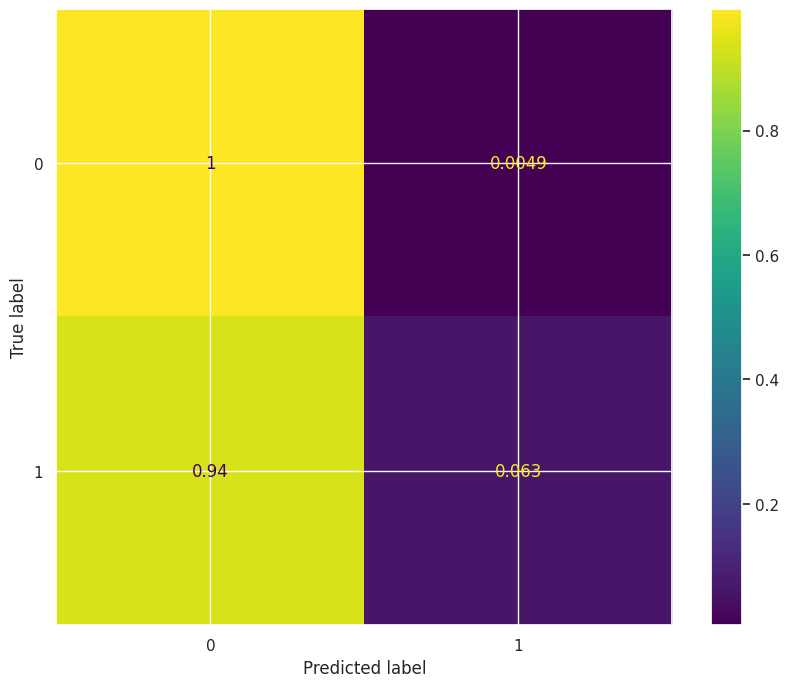

In [193]:
ConfusionMatrixDisplay.from_estimator(kNN, x_test, y_test, normalize='true')

print(confusion_matrix(y_test,kNN.predict(x_test), normalize='true'))

<Axes: xlabel='size', ylabel='value'>

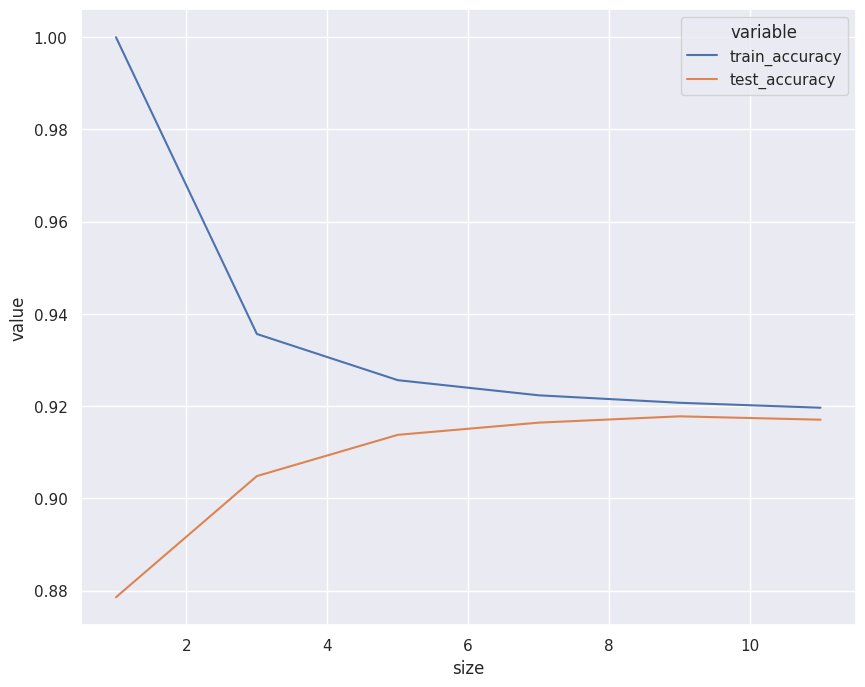

In [194]:
sns.set_style("darkgrid")
sns.lineplot(x = 'size', y = 'value', hue = 'variable', data=pd.melt(accuracy, ['size']))

8) ВЫВОДЫ

- Лучшую точность показал классификатор random forest.
Классификатор случайный лес показал точность выше, чем kNN. Возросла точность предсказания повышения, что существенно для рассматриваемой задачи.
- kNN показал точность ниже случайного леса. Самую высокую точность показал алгоритм, который классифицировал по 9 соседям.




RANDOM FOREST

<ipython-input-195-ddfe47737f4b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-195-ddfe47737f4b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-195-ddfe47737f4b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-195-ddfe47737f4b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-195-ddfe47737f4b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was exp

Best hyperparameters: {'n_estimators': 50, 'max_depth': 40}


<ipython-input-195-ddfe47737f4b>:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-195-ddfe47737f4b>:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-195-ddfe47737f4b>:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-195-ddfe47737f4b>:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-195-ddfe47737f4b>:32: DataConversionWarning: A column-vector y was passed when a 1d array was exp

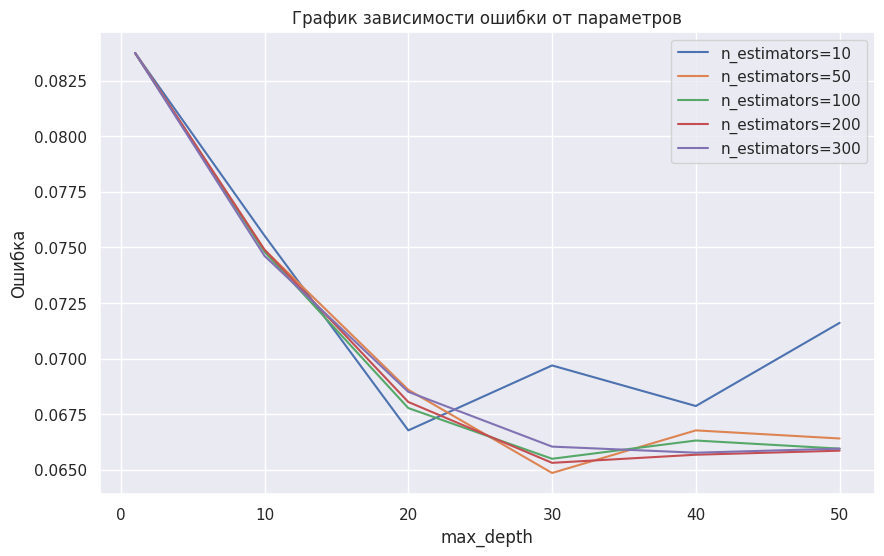

In [195]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()

n_estimators = [10, 50, 100, 200, 300]
max_depth = [1,10,20,30,40,50]

parameters = {'n_estimators': n_estimators, 'max_depth': max_depth}

# Поиск оптимальных параметров
best_accuracy = 0
best_params = {'n_estimators': None, 'max_depth': None}
for n in n_estimators:
  for depth in max_depth:
    model.set_params(n_estimators=n, max_depth=depth)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy1=accuracy_score(y_test, y_pred)
    if accuracy1 > best_accuracy:
      best_accuracy = accuracy1
      best_params['n_estimators'] = n
      best_params['max_depth'] = depth
print("Best hyperparameters:", best_params)

#График зависимости ошибки от параметров
error_rates = np.zeros((len(n_estimators), len(max_depth)))
for i in range(len(n_estimators)):
  for j in range(len(max_depth)):
    model.set_params(n_estimators=n_estimators[i], max_depth=max_depth[j])
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    error_rates[i, j] = 1 - accuracy_score(y_test, y_pred)

plt.figure(figsize=(10, 6))
for i in range(len(n_estimators)):
  plt.plot(max_depth, error_rates[i], label=f'n_estimators={n_estimators[i]}')
plt.xlabel('max_depth')
plt.ylabel('Ошибка')
plt.title('График зависимости ошибки от параметров')
plt.legend()
plt.show()


In [157]:
# обучение модели с оптимальными параметрами
rfc = RandomForestClassifier(n_estimators= 50, max_depth= 30).fit(x_train, y_train)

y_pred = rfc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

<ipython-input-157-e13a4b7786db>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc = RandomForestClassifier(n_estimators= 50, max_depth= 30).fit(x_train, y_train)


Confusion matrix:
[[10020    24]
 [  706   212]]


Т.к. данных довольно много и из-за того, что метод работает медленно, получаем довольно большую ошибку.
Чтобы уменьшить ошибку потребуется больше времени.

ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Лучший параметр: 100


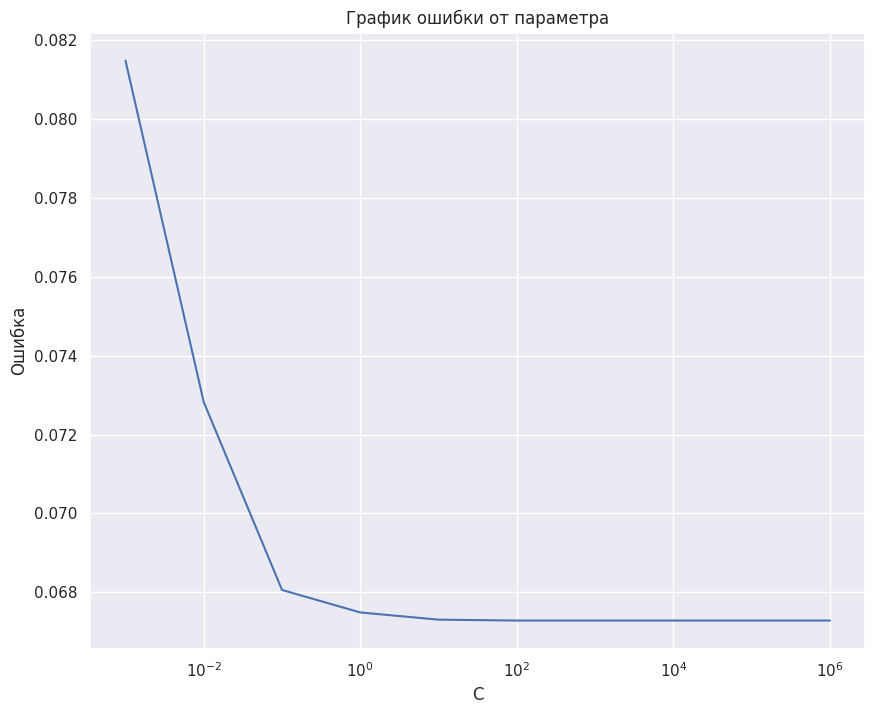

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
model.fit(x_train, y_train)

param_grid = {'C': [0.001 ,0.01, 0.1, 1, 10, 100, 1000, 10000, 1000000]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(x_train, y_train)
best_param = grid.best_params_['C']
print('Лучший параметр:', best_param)

C = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 1000000]
error = [1 - x for x in grid.cv_results_['mean_test_score']]
plt.plot(C, error)
plt.xlabel('C')
plt.ylabel('Ошибка')
plt.title('График ошибки от параметра')
plt.xscale('log')
plt.show()

In [ ]:
lr = LogisticRegression(C=100).fit(x_train, y_train)
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

In [198]:
min(error)

0.0672809509710337

Логистическая регрессия работает быстрее, но ошибка от параметров больше, чем у RandomForest.

ПОЛНОСВЯЗНАЯ НЕЙРОННАЯ СЕТЬ

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed w

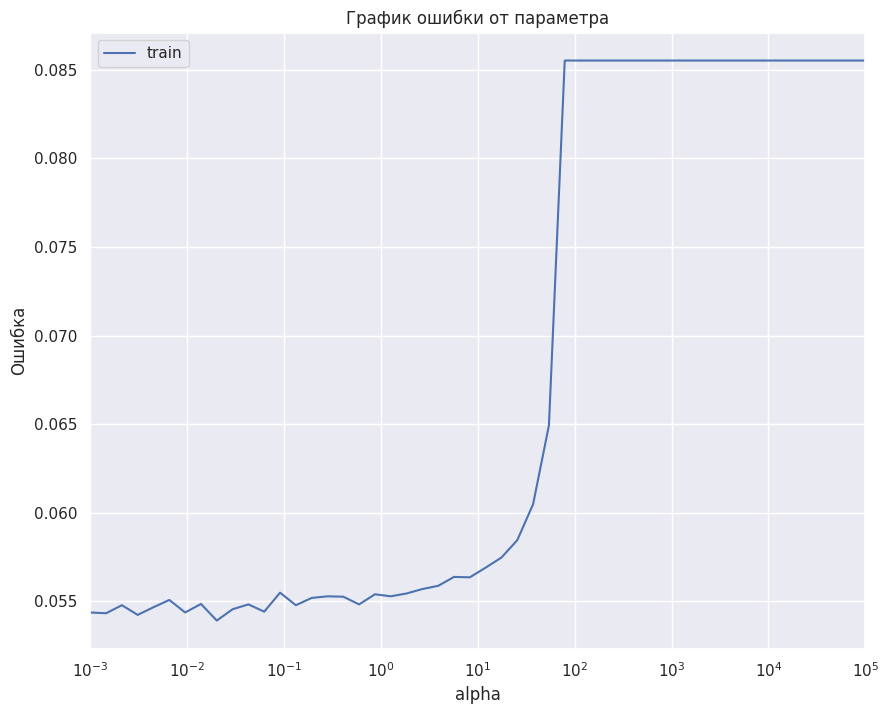

In [199]:
from sklearn.neural_network import  MLPClassifier
from sklearn.metrics import accuracy_score
alpha_arr =np.logspace(-3, 5)
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = (8,2),
                              solver = 'lbfgs', activation = 'logistic', alpha = alpha, max_iter=1000, random_state = 42)
    mlp_model.fit(x_train, y_train)
    y_train_pred = mlp_model.predict(x_train)
    train_err.append(np.mean(y_train.values.ravel() != y_train_pred))
    #train_err.extend([np.mean(y_train != y_train_pred)])
plt.semilogx(alpha_arr, train_err, label = 'train')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('График ошибки от параметра')
plt.xlabel('alpha')
plt.ylabel('Ошибка')
plt.legend()

In [200]:
min(train_err)

0.05391597865255668

In [201]:
mlp_model_best = MLPClassifier(hidden_layer_sizes = (8,2),
                              solver = 'lbfgs', activation = 'logistic', alpha = 0.01, max_iter=1000, random_state = 42).fit(x_train, y_train)
y_pred = mlp_model_best.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix:
[[10019    25]
 [  624   294]]


ВЫВОД: Минимальную ошибку от параметров показала полносвязная нейронная сеть. Но ошибка всё равно достаточно велика.